In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import sklearn.metrics as metrics
from sklearn.utils import resample

In [2]:
df=pd.read_csv('C:/Users/User/Desktop/datascience/customer_booking.csv',encoding='ISO-8859-1')

In [3]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
#encode flight_day 
mapping={
    'Mon':1,
    'Tue':2,
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7,
}

In [8]:
df['flight_day']=df['flight_day'].map(mapping)

In [9]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [10]:
df['trip_type'].value_counts(normalize=True)*100

RoundTrip     98.994
OneWay         0.774
CircleTrip     0.232
Name: trip_type, dtype: float64

In [11]:
df['sales_channel'].value_counts(normalize=True)*100

Internet    88.764
Mobile      11.236
Name: sales_channel, dtype: float64

In [12]:
df2=pd.get_dummies(columns=['sales_channel','trip_type'],data=df)

df2

In [13]:
df2

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1,0,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1,0,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1


In [14]:
df2.isna().sum()

num_passengers            0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
route                     0
booking_origin            0
wants_extra_baggage       0
wants_preferred_seat      0
wants_in_flight_meals     0
flight_duration           0
booking_complete          0
sales_channel_Internet    0
sales_channel_Mobile      0
trip_type_CircleTrip      0
trip_type_OneWay          0
trip_type_RoundTrip       0
dtype: int64

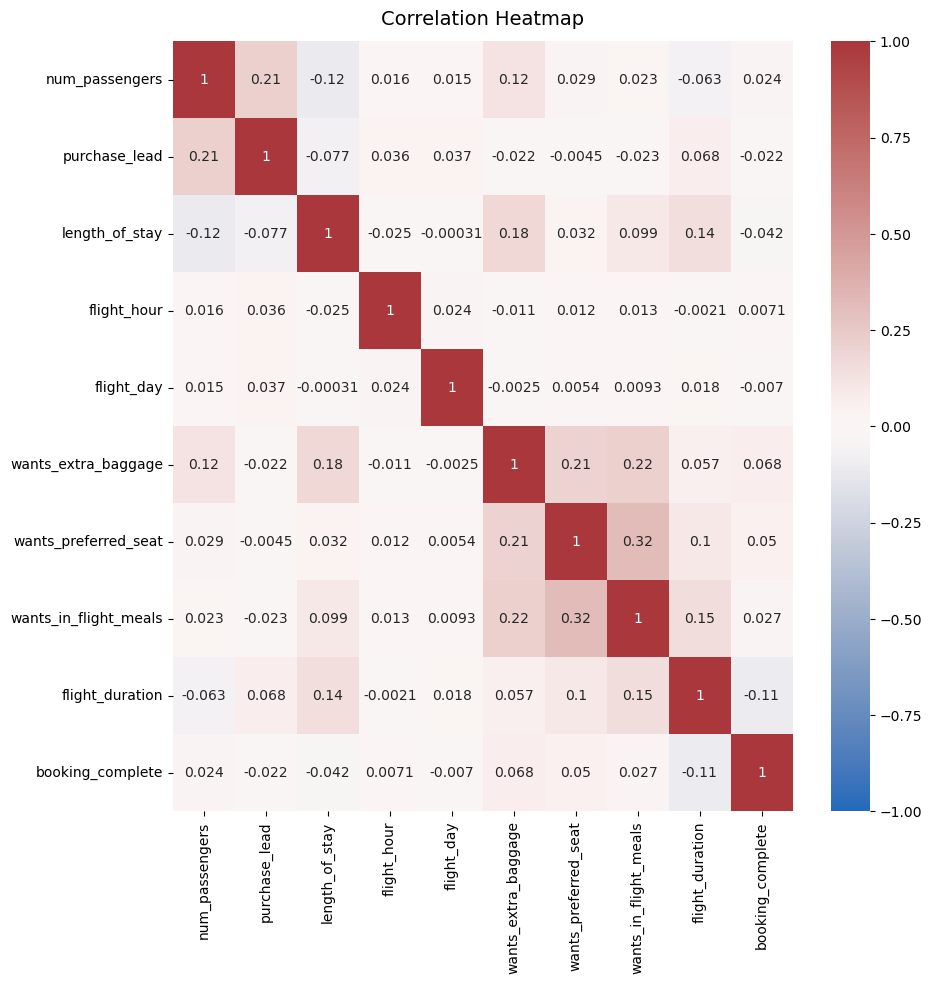

In [15]:
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14},pad=12);

<AxesSubplot:xlabel='length_of_stay'>

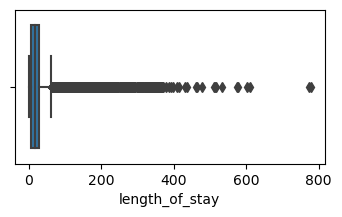

In [16]:
#flight duration boxplot
plt.figure(figsize=(4,2))
sns.boxplot(x=df2['length_of_stay'])

In [17]:
df2['length_of_stay'].describe()

count    50000.00000
mean        23.04456
std         33.88767
min          0.00000
25%          5.00000
50%         17.00000
75%         28.00000
max        778.00000
Name: length_of_stay, dtype: float64

In [18]:
#there are outliers in the length_of_stay column lets check them out
percentile75=df['length_of_stay'].quantile(0.75)
percentile25=df['length_of_stay'].quantile(0.25)
iqr=percentile75 - percentile25
upper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr
outliers=df[(df['length_of_stay'] >upper_limit) | (df['length_of_stay']<lower_limit)]
print('outliers', len(outliers))
print('upper limit ', upper_limit)
print('lower limit ',lower_limit)

outliers 3807
upper limit  62.5
lower limit  -29.5


In [19]:
df2[df2['length_of_stay']>500]



,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
1583,2,32,603,0,4,AKLKUL,Malaysia,0,0,0,8.83,0,1,0,0,0,1
10294,1,10,610,2,1,DMKSYD,Australia,1,1,0,8.58,0,1,0,0,0,1
10821,1,102,778,8,3,DPSMEL,Australia,0,0,0,8.83,1,1,0,0,0,1
13214,1,20,532,11,4,HYDPER,India,1,0,1,5.62,0,1,0,0,0,1
13439,1,18,513,10,6,HYDSYD,India,1,1,1,8.58,0,0,1,0,0,1
14828,1,112,510,23,4,IKAMEL,Australia,1,1,1,8.83,0,1,0,0,0,1
21582,1,9,573,11,4,OOLPNH,Australia,1,1,1,8.83,0,1,0,0,0,1
22081,2,11,773,16,6,OOLTPE,Taiwan,1,0,1,8.83,0,1,0,0,0,1
23179,1,65,517,14,2,PERPNH,Australia,1,1,1,5.62,0,1,0,0,0,1
24154,1,367,577,2,1,PNHSYD,Australia,0,0,1,8.58,0,1,0,0,0,1


<AxesSubplot:xlabel='purchase_lead'>

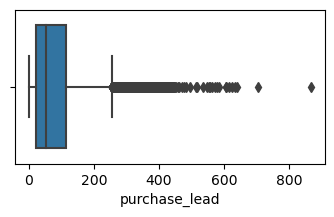

In [20]:
#flight duration boxplot
plt.figure(figsize=(4,2))
sns.boxplot(x=df2['purchase_lead'])

In [21]:
df2[df2['purchase_lead']>600]

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
835,3,641,46,6,7,AKLKUL,Malaysia,1,0,1,8.83,1,1,0,0,0,1
6148,1,614,19,11,3,COKMEL,Australia,0,0,0,8.83,0,1,0,0,0,1
24119,1,704,23,8,2,PNHSYD,Australia,0,0,0,8.58,0,1,0,0,0,1
38356,2,633,5,10,6,HKTOOL,Australia,0,0,1,8.83,0,1,0,0,0,1
39417,1,625,5,15,5,ICNRGN,Myanmar (Burma),0,0,0,6.62,0,0,1,0,0,1
42916,1,605,6,18,4,BLRMEL,India,0,0,0,8.83,0,0,1,0,0,1
46716,2,606,6,6,5,HKTTPE,United States,0,0,1,4.67,0,1,0,0,0,1
48259,3,867,6,7,1,KIXMLE,Japan,0,0,1,7.00,1,1,0,0,0,1


In [22]:
df2[df2['booking_origin']=='Japan']

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
69,1,2,165,3,1,AKLKIX,Japan,1,0,0,7.00,0,1,0,0,0,1
70,1,26,111,13,1,AKLKIX,Japan,1,0,1,7.00,0,1,0,0,0,1
73,1,198,207,10,7,AKLKIX,Japan,1,0,1,7.00,0,1,0,0,0,1
74,1,23,27,11,6,AKLKIX,Japan,0,0,0,7.00,0,1,0,0,0,1
222,1,106,208,4,4,AKLKUL,Japan,1,0,0,8.83,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,1,14,6,7,3,KNOPVG,Japan,0,0,0,5.33,1,1,0,0,0,1
48989,1,176,6,11,6,MELSGN,Japan,0,0,0,8.83,0,0,1,0,0,1
49486,3,182,6,1,1,PEKSYD,Japan,1,0,0,8.58,0,1,0,0,0,1
49533,2,3,6,8,1,PEKTWU,Japan,0,0,0,6.42,1,1,0,0,0,1


In [23]:
df2.drop(columns=['route','booking_origin'],axis=1,inplace=True)

In [24]:
df2.head(5)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,1,0,0,0,1


In [25]:
df2['booking_complete'].value_counts(normalize=True)*100

0    85.044
1    14.956
Name: booking_complete, dtype: float64

In [26]:
majority=df2[df2['booking_complete']==0]
minority=df2[df2['booking_complete']==1]

In [27]:
majority_downsampled = resample(majority,
                                replace=False,  # Sample without replacement
                                n_samples=len(minority),  # Match minority class size
                                random_state=42)

In [28]:
downsampled=pd.concat([majority_downsampled,minority])

In [29]:
downsampled['booking_complete'].value_counts(normalize=True)*100

0    50.0
1    50.0
Name: booking_complete, dtype: float64

In [30]:
#lets fit a RandomForest machine learning model
y=downsampled['booking_complete']
X=downsampled.drop('booking_complete',axis=1)

In [31]:
#separate into training and test set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y, random_state=42)

In [32]:
X_train

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
47805,1,114,6,17,4,1,0,0,8.58,1,0,0,0,1
8705,1,96,28,4,2,1,1,0,8.58,1,0,0,0,1
39779,4,138,5,9,5,1,1,1,8.83,1,0,0,0,1
3995,1,24,70,12,1,1,0,0,7.00,1,0,0,0,1
15335,1,29,57,16,7,1,0,0,4.75,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,4,16,4,14,2,1,0,1,8.58,0,1,0,0,1
18969,1,29,19,12,1,1,0,0,8.83,0,1,0,0,1
5175,1,106,42,9,2,1,0,1,6.42,1,0,0,0,1
29934,1,38,4,2,5,0,0,1,7.00,1,0,0,0,1


In [33]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [34]:
cv_params = {'max_depth': [10,50], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [2,4,6],
             'min_samples_split': [2,3,4],
             'n_estimators': [100, 500],
             }  
scoring={'recall','accuracy','precision','f1'}

In [35]:
rf2=GridSearchCV(rf,cv_params,cv=4, refit='f1', scoring=scoring)

In [36]:
%%time
rf2.fit(X_train,y_train)

Wall time: 43min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [10, 50], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 500]},
             refit='f1', scoring={'recall', 'precision', 'accuracy', 'f1'})

In [37]:
rf2.best_estimator_

RandomForestClassifier(max_depth=50, max_features=1.0, max_samples=0.7,
                       min_samples_leaf=6, n_jobs=-1, random_state=42)

In [38]:
rf2.best_score_

0.6383499178430981

In [42]:
y_pred=rf2.predict(X_test)

In [43]:
print('accuracy ',metrics.accuracy_score(y_test,y_pred))
print('recall ', metrics.recall_score(y_test,y_pred))
print('precision ', metrics.precision_score(y_test,y_pred))

accuracy  0.6304880766659238
recall  0.6344181899242086
precision  0.6293675364882795


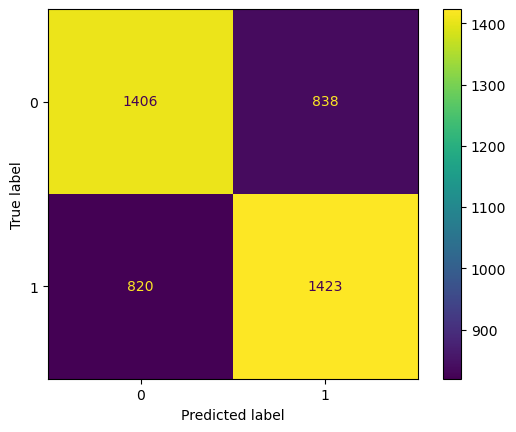

In [44]:
cm=metrics.confusion_matrix(y_test,y_pred, labels=rf2.classes_)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf2.classes_)
disp.plot()

In [46]:
tree2_importances=pd.DataFrame(rf2.best_estimator_.feature_importances_, columns=['gini_importance'],index=X.columns)
tree2_importances=tree2_importances.sort_values(by='gini_importance',ascending=False)
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
purchase_lead,0.255084
length_of_stay,0.186328
flight_duration,0.163135
flight_hour,0.155864
flight_day,0.095007
num_passengers,0.038941
wants_extra_baggage,0.037895
wants_in_flight_meals,0.026320
wants_preferred_seat,0.023137
sales_channel_Internet,0.007626


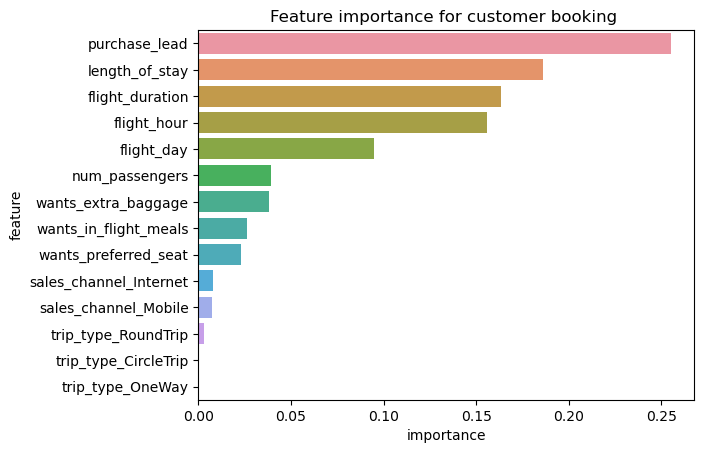

In [50]:
sns.barplot(data=tree2_importances,x='gini_importance',y=tree2_importances.index,orient='h')
plt.title('Feature importance for customer booking ')
plt.ylabel('feature')
plt.xlabel('importance')
plt.show()
